In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Flatten, Softmax

In [ ]:
df = pd.read_csv("03_circle.csv")
print(df.shape)
print(df.head())
print(df.describe())
data = df.to_numpy()
X = data[0:150,0:2]
Xval = data[150:200,0:2]
Xtest = data[200:250,0:2]
y = data[0:150,2]
yval = data[150:200,2]
ytest = data[200:250,2]

(1000, 3)
         x        y  label
0 -0.71551  0.59070    1.0
1  0.44738  0.61331    1.0
2  1.10156  0.01875    0.0
3 -0.51240 -0.53197    1.0
4 -0.60674 -0.40527    1.0
                 x            y       label
count  1000.000000  1000.000000  1000.00000
mean     -0.001137    -0.003357     0.50000
std       0.647163     0.648830     0.50025
min      -1.198160    -1.156330     0.00000
25%      -0.606755    -0.602648     0.00000
50%      -0.006030    -0.017285     0.50000
75%       0.612818     0.592037     1.00000
max       1.240780     1.212130     1.00000


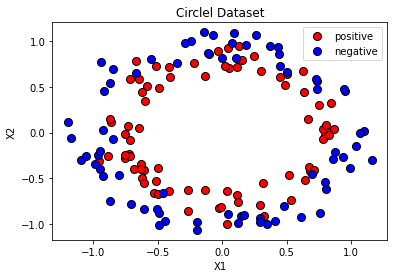

In [ ]:
# Find Indices of Positive and Negative Examples
pos = (y==1)
neg = (y==0)

# Plot Examples
fig = plt.figure()
plt.plot(X[pos, 0], X[pos, 1], 'o', markerfacecolor='r', markersize=8, markeredgecolor='k')
plt.plot(X[neg, 0], X[neg, 1], 'o', mfc='b', ms=8, mec='k')
plt.xlabel('X1')
plt.title('Circlel Dataset')
plt.ylabel('X2')
plt.legend(['positive', 'negative'])
plt.show()

In [ ]:
tf.random.set_seed(42)

def build_model():

  model = models.Sequential()
  model.add(Dense(10, activation='relu', kernel_initializer='he_normal',input_shape=(2,), name='Hidden1'))
  model.add(Dense(10, activation='relu', kernel_initializer='he_normal', name='Hidden2'))
  model.add(Dense(10, activation='relu', kernel_initializer='he_normal', name='Hidden3'))
  model.add(Dense(1, activation='sigmoid', name='Output'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.03), loss='binary_crossentropy', metrics = ['accuracy'])

  return model

In [ ]:
#print(model.weights)
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden1 (Dense)              (None, 10)                30        
_________________________________________________________________
Hidden2 (Dense)              (None, 10)                110       
_________________________________________________________________
Hidden3 (Dense)              (None, 10)                110       
_________________________________________________________________
Output (Dense)               (None, 1)                 11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)

model = build_model()
history = model.fit(X,y, validation_data=(Xval,yval), epochs=50, batch_size=150)

Epoch 1/50
1/1 [==============================] - 1s 986ms/step - loss: 0.6926 - accuracy: 0.5200 - val_loss: 0.6703 - val_accuracy: 0.5600
Epoch 2/50
1/1 [==============================] - 0s 20ms/step - loss: 0.6832 - accuracy: 0.5400 - val_loss: 0.6630 - val_accuracy: 0.5600
Epoch 3/50
1/1 [==============================] - 0s 22ms/step - loss: 0.6806 - accuracy: 0.5667 - val_loss: 0.6596 - val_accuracy: 0.5800
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 0.6753 - accuracy: 0.5667 - val_loss: 0.6595 - val_accuracy: 0.6600
Epoch 5/50
1/1 [==============================] - 0s 22ms/step - loss: 0.6695 - accuracy: 0.6267 - val_loss: 0.6614 - val_accuracy: 0.7400
Epoch 6/50
1/1 [==============================] - 0s 27ms/step - loss: 0.6651 - accuracy: 0.6467 - val_loss: 0.6610 - val_accuracy: 0.7400
Epoch 7/50
1/1 [==============================] - 0s 23ms/step - loss: 0.6600 - accuracy: 0.6600 - val_loss: 0.6586 - val_accuracy: 0.6600
Epoch 8/50
1/1 [==========

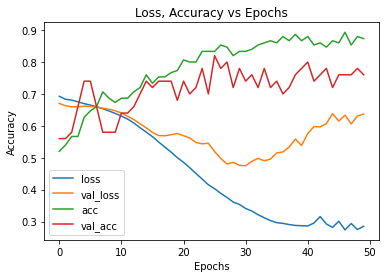

In [ ]:
#plot the learning curves
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# evaluate the model on the test set
loss, acc = model.evaluate(Xtest, ytest)
print('test_loss:', loss)
print('test_acc:', acc)

2/2 [==============================] - 0s 4ms/step - loss: 0.3423 - accuracy: 0.8200
test_loss: 0.3423050343990326
test_acc: 0.8199999928474426


#Base Class Callback

In [ ]:
from tensorflow.keras.callbacks import Callback

class my_callback(Callback):
  # Called at the beginning of training.
  def on_train_begin(self, logs=None):
    print("training start")
  # Called at the beginnning of a training batch 
  def on_train_batch_begin(self, batch, logs=None):
    print(f"Begin of batch:{batch}")
  # Called at the end of an epoch.
  def on_epoch_end(self, epoch, logs=None):
    print(f"End of epoch:{epoch}")

In [ ]:
tf.random.set_seed(42)

model = build_model()
history = model.fit(X,y, validation_data=(Xval,yval), epochs=50, batch_size=10, callbacks=[my_callback()], verbose = False)

In [ ]:
class my_callback1(Callback):
  # Called at the beginning of evaluation or validation.
  def on_test_begin(self, logs=None):
    print("testing start")
  # Called at the beginning of a batch in evaluate methods.
  # Print the loss after each even batch in the test set
  def on_test_batch_end(self, batch, logs=None):
    if (batch%2)==0:
      print(f"End of batch:{batch} with {logs['loss']:.4f}")

In [ ]:
# evaluate the model on the test set using callback
model.evaluate(Xtest, ytest, verbose=False, callbacks=[my_callback1()])
print('test_loss:', loss)
print('test_acc:', acc)

testing start
End of batch:0 with 0.5114
test_loss: 0.3423050343990326
test_acc: 0.8199999928474426


In [ ]:
class my_callback2(Callback):
  # Called at the beginning of prediction.
  def on_predict_begin(self, logs=None):
    print("prediction start")
  # Called at the end of prediction.
  def on_predict_end(self, logs=None):
    print("prediction end")

In [ ]:
# make a predictionon the first example of the test set using callback
model.predict(Xtest[0:1,:], verbose=False, callbacks=[my_callback2()])

prediction start
prediction end


array([[0.09080061]], dtype=float32)

#Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, 
                                  min_delta = 0.001, restore_best_weights = True)

In [ ]:
tf.random.set_seed(42)

model = build_model()
history = model.fit(X,y, validation_data=(Xval,yval), epochs=50, 
                    batch_size=150, callbacks=[early_stopping_cb])

Epoch 1/50
1/1 [==============================] - 1s 538ms/step - loss: 0.6926 - accuracy: 0.5200 - val_loss: 0.6703 - val_accuracy: 0.5600
Epoch 2/50
1/1 [==============================] - 0s 25ms/step - loss: 0.6832 - accuracy: 0.5400 - val_loss: 0.6630 - val_accuracy: 0.5600
Epoch 3/50
1/1 [==============================] - 0s 25ms/step - loss: 0.6806 - accuracy: 0.5667 - val_loss: 0.6596 - val_accuracy: 0.5800
Epoch 4/50
1/1 [==============================] - 0s 23ms/step - loss: 0.6753 - accuracy: 0.5667 - val_loss: 0.6595 - val_accuracy: 0.6600
Epoch 5/50
1/1 [==============================] - 0s 22ms/step - loss: 0.6695 - accuracy: 0.6267 - val_loss: 0.6614 - val_accuracy: 0.7400
Epoch 6/50
1/1 [==============================] - 0s 25ms/step - loss: 0.6651 - accuracy: 0.6467 - val_loss: 0.6610 - val_accuracy: 0.7400
Epoch 7/50
1/1 [==============================] - 0s 26ms/step - loss: 0.6600 - accuracy: 0.6600 - val_loss: 0.6586 - val_accuracy: 0.6600
Epoch 8/50
1/1 [==========

In [ ]:
# evaluate the model on the val set (restore_best_weights)
loss_val, acc_val = model.evaluate(Xval, yval)
print('val_loss:', loss_val)
print('val_acc:', acc_val)

2/2 [==============================] - 0s 6ms/step - loss: 0.4750 - accuracy: 0.7400
val_loss: 0.4749698340892792
val_acc: 0.7400000095367432


In [ ]:
# evaluate the model on the test set (not restore_best_weights)
# note: the performance on test set might not be too good since we have very small validation and test set (for experiment only)
loss, acc = model.evaluate(Xtest, ytest)
print('test_loss:', loss)
print('test_acc:', acc)

2/2 [==============================] - 0s 7ms/step - loss: 0.3819 - accuracy: 0.8000
test_loss: 0.381900817155838
test_acc: 0.800000011920929


# Save the model

In [ ]:
# save weights only
model.save_weights('my_model')

In [ ]:
del model
model

NameError: ignored

In [ ]:
# rebuild the model
model = build_model()
model.load_weights('my_model')
model.weights

[<tf.Variable 'Hidden1/kernel:0' shape=(2, 10) dtype=float32, numpy=
 array([[-0.14352503, -1.5406    , -0.2036868 , -1.7071185 , -0.07331898,
          0.37195143,  0.9355364 ,  1.035599  , -0.09260904,  1.3429852 ],
        [ 1.3601528 , -0.11323583,  2.0052977 ,  1.2803279 ,  1.7037355 ,
         -1.5368676 , -1.4961278 , -1.4114877 ,  0.73831874,  1.4365636 ]],
       dtype=float32)>,
 <tf.Variable 'Hidden1/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.34684926, -0.1265885 ,  0.53527737, -0.44916072,  0.3374906 ,
        -0.3176059 , -0.25538018, -0.3452123 ,  0.08690438, -0.2157674 ],
       dtype=float32)>,
 <tf.Variable 'Hidden2/kernel:0' shape=(10, 10) dtype=float32, numpy=
 array([[ 0.2861239 , -0.46765113,  0.10980675,  0.5746817 ,  0.74449867,
          0.38128367, -0.3687378 , -0.334104  , -0.55701184, -0.19166979],
        [-0.40525728,  0.9310833 ,  0.7231526 ,  0.9293515 ,  0.21830346,
          0.5437345 , -0.6049353 , -0.50465715, -0.2369287 ,  0.42719525],
    

In [ ]:
# manuall save the model
model.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
del model
model

NameError: ignored

In [ ]:
model = models.load_model('my_model')
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden1 (Dense)              (None, 10)                30        
_________________________________________________________________
Hidden2 (Dense)              (None, 10)                110       
_________________________________________________________________
Hidden3 (Dense)              (None, 10)                110       
_________________________________________________________________
Output (Dense)               (None, 1)                 11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# for deleting the folder
!rm -r my_model

In [ ]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden1 (Dense)              (None, 10)                30        
_________________________________________________________________
Hidden2 (Dense)              (None, 10)                110       
_________________________________________________________________
Hidden3 (Dense)              (None, 10)                110       
_________________________________________________________________
Output (Dense)               (None, 1)                 11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.save_weights('my_model.h5')

In [ ]:
del model
model

NameError: ignored

In [ ]:
model = build_model()
model.load_weights('my_model.h5')
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden1 (Dense)              (None, 10)                30        
_________________________________________________________________
Hidden2 (Dense)              (None, 10)                110       
_________________________________________________________________
Hidden3 (Dense)              (None, 10)                110       
_________________________________________________________________
Output (Dense)               (None, 1)                 11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [ ]:
!rm -rf my_model

#Model Checkpoint

In [ ]:
# save weights only
from tensorflow.keras.callbacks import ModelCheckpoint
model_checkpoint_cb = ModelCheckpoint('my_model', save_weights_only = True)
#model_checkpoint_cb = ModelCheckpoint('my_model.h5', save_weights_only = True)

In [ ]:
tf.random.set_seed(42)

model = build_model()
history = model.fit(X,y, validation_data=(Xval,yval), epochs=50, batch_size=150, callbacks=[early_stopping_cb, model_checkpoint_cb])

Epoch 1/50
1/1 [==============================] - 1s 520ms/step - loss: 0.6926 - accuracy: 0.5200 - val_loss: 0.6703 - val_accuracy: 0.5600
Epoch 2/50
1/1 [==============================] - 0s 20ms/step - loss: 0.6832 - accuracy: 0.5400 - val_loss: 0.6630 - val_accuracy: 0.5600
Epoch 3/50
1/1 [==============================] - 0s 25ms/step - loss: 0.6806 - accuracy: 0.5667 - val_loss: 0.6596 - val_accuracy: 0.5800
Epoch 4/50
1/1 [==============================] - 0s 19ms/step - loss: 0.6753 - accuracy: 0.5667 - val_loss: 0.6595 - val_accuracy: 0.6600
Epoch 5/50
1/1 [==============================] - 0s 20ms/step - loss: 0.6695 - accuracy: 0.6267 - val_loss: 0.6614 - val_accuracy: 0.7400
Epoch 6/50
1/1 [==============================] - 0s 20ms/step - loss: 0.6651 - accuracy: 0.6467 - val_loss: 0.6610 - val_accuracy: 0.7400
Epoch 7/50
1/1 [==============================] - 0s 21ms/step - loss: 0.6600 - accuracy: 0.6600 - val_loss: 0.6586 - val_accuracy: 0.6600
Epoch 8/50
1/1 [==========

In [ ]:
# All model including architecture 
from tensorflow.keras.callbacks import ModelCheckpoint
model_checkpoint_cb = ModelCheckpoint('my_model')
#model_checkpoint_cb = ModelCheckpoint('my_model.h5')
tf.random.set_seed(42)

model = build_model()
history = model.fit(X,y, validation_data=(Xval,yval), epochs=50, batch_size=150, callbacks=[early_stopping_cb, model_checkpoint_cb])

Epoch 1/50
1/1 [==============================] - 0s 490ms/step - loss: 0.6926 - accuracy: 0.5200 - val_loss: 0.6703 - val_accuracy: 0.5600


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 2/50
1/1 [==============================] - 0s 20ms/step - loss: 0.6832 - accuracy: 0.5400 - val_loss: 0.6630 - val_accuracy: 0.5600


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 3/50
1/1 [==============================] - 0s 21ms/step - loss: 0.6806 - accuracy: 0.5667 - val_loss: 0.6596 - val_accuracy: 0.5800


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 4/50
1/1 [==============================] - 0s 23ms/step - loss: 0.6753 - accuracy: 0.5667 - val_loss: 0.6595 - val_accuracy: 0.6600


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 5/50
1/1 [==============================] - 0s 19ms/step - loss: 0.6695 - accuracy: 0.6267 - val_loss: 0.6614 - val_accuracy: 0.7400


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 6/50
1/1 [==============================] - 0s 23ms/step - loss: 0.6651 - accuracy: 0.6467 - val_loss: 0.6610 - val_accuracy: 0.7400


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 7/50
1/1 [==============================] - 0s 22ms/step - loss: 0.6600 - accuracy: 0.6600 - val_loss: 0.6586 - val_accuracy: 0.6600


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 8/50
1/1 [==============================] - 0s 21ms/step - loss: 0.6536 - accuracy: 0.7067 - val_loss: 0.6554 - val_accuracy: 0.5800


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 9/50
1/1 [==============================] - 0s 22ms/step - loss: 0.6466 - accuracy: 0.6867 - val_loss: 0.6521 - val_accuracy: 0.5800


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 10/50
1/1 [==============================] - 0s 21ms/step - loss: 0.6390 - accuracy: 0.6733 - val_loss: 0.6471 - val_accuracy: 0.5800


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 11/50
1/1 [==============================] - 0s 22ms/step - loss: 0.6305 - accuracy: 0.6867 - val_loss: 0.6403 - val_accuracy: 0.6400


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 12/50
1/1 [==============================] - 0s 22ms/step - loss: 0.6213 - accuracy: 0.6867 - val_loss: 0.6299 - val_accuracy: 0.6400


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 13/50
1/1 [==============================] - 0s 21ms/step - loss: 0.6088 - accuracy: 0.7067 - val_loss: 0.6196 - val_accuracy: 0.6600


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 14/50
1/1 [==============================] - 0s 20ms/step - loss: 0.5942 - accuracy: 0.7200 - val_loss: 0.6068 - val_accuracy: 0.7000


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 15/50
1/1 [==============================] - 0s 21ms/step - loss: 0.5804 - accuracy: 0.7600 - val_loss: 0.5936 - val_accuracy: 0.7400


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 16/50
1/1 [==============================] - 0s 21ms/step - loss: 0.5661 - accuracy: 0.7333 - val_loss: 0.5794 - val_accuracy: 0.7200


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 17/50
1/1 [==============================] - 0s 20ms/step - loss: 0.5494 - accuracy: 0.7533 - val_loss: 0.5695 - val_accuracy: 0.7400


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 18/50
1/1 [==============================] - 0s 22ms/step - loss: 0.5331 - accuracy: 0.7533 - val_loss: 0.5689 - val_accuracy: 0.7400


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 19/50
1/1 [==============================] - 0s 28ms/step - loss: 0.5177 - accuracy: 0.7667 - val_loss: 0.5721 - val_accuracy: 0.7400


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 20/50
1/1 [==============================] - 0s 22ms/step - loss: 0.5003 - accuracy: 0.7733 - val_loss: 0.5759 - val_accuracy: 0.6800


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 21/50
1/1 [==============================] - 0s 22ms/step - loss: 0.4857 - accuracy: 0.8067 - val_loss: 0.5692 - val_accuracy: 0.7400


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 22/50
1/1 [==============================] - 0s 20ms/step - loss: 0.4689 - accuracy: 0.8000 - val_loss: 0.5621 - val_accuracy: 0.7000


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 23/50
1/1 [==============================] - 0s 21ms/step - loss: 0.4507 - accuracy: 0.8000 - val_loss: 0.5478 - val_accuracy: 0.7200


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 24/50
1/1 [==============================] - 0s 21ms/step - loss: 0.4332 - accuracy: 0.8333 - val_loss: 0.5438 - val_accuracy: 0.7800


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 25/50
1/1 [==============================] - 0s 40ms/step - loss: 0.4155 - accuracy: 0.8333 - val_loss: 0.5455 - val_accuracy: 0.7000


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 26/50
1/1 [==============================] - 0s 22ms/step - loss: 0.4030 - accuracy: 0.8333 - val_loss: 0.5195 - val_accuracy: 0.8200


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 27/50
1/1 [==============================] - 0s 21ms/step - loss: 0.3883 - accuracy: 0.8533 - val_loss: 0.4977 - val_accuracy: 0.7800


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 28/50
1/1 [==============================] - 0s 23ms/step - loss: 0.3757 - accuracy: 0.8467 - val_loss: 0.4806 - val_accuracy: 0.8000


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 29/50
1/1 [==============================] - 0s 21ms/step - loss: 0.3611 - accuracy: 0.8200 - val_loss: 0.4855 - val_accuracy: 0.7200


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 30/50
1/1 [==============================] - 0s 25ms/step - loss: 0.3536 - accuracy: 0.8333 - val_loss: 0.4763 - val_accuracy: 0.7800


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 31/50
1/1 [==============================] - 0s 26ms/step - loss: 0.3410 - accuracy: 0.8333 - val_loss: 0.4750 - val_accuracy: 0.7400


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 32/50
1/1 [==============================] - 0s 21ms/step - loss: 0.3329 - accuracy: 0.8400 - val_loss: 0.4887 - val_accuracy: 0.7600


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 33/50
1/1 [==============================] - 0s 24ms/step - loss: 0.3216 - accuracy: 0.8533 - val_loss: 0.4982 - val_accuracy: 0.7200


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 34/50
1/1 [==============================] - 0s 21ms/step - loss: 0.3119 - accuracy: 0.8600 - val_loss: 0.4904 - val_accuracy: 0.7800


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 35/50
1/1 [==============================] - 0s 22ms/step - loss: 0.3031 - accuracy: 0.8667 - val_loss: 0.4957 - val_accuracy: 0.7200


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Epoch 36/50
1/1 [==============================] - 0s 29ms/step - loss: 0.2965 - accuracy: 0.8600 - val_loss: 0.5149 - val_accuracy: 0.7400


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


# ลบไฟล์ทีมาจากการ save แบบ manual
# ลบ directory และ ไฟล์ จากการ save
## !rm -rf my_model 

In [ ]:
!rm -rf my_model 

In [ ]:
# more saving criteria - save_best_only
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = 'checkpoint/my_model'
model_checkpoint_cb = ModelCheckpoint(checkpoint_path, save_weight_only=True, 
                                      save_best_only=True, monitor='accuracy', mode='max')

tf.random.set_seed(42)
model = build_model()
history = model.fit(X,y, validation_data=(Xval,yval), epochs=50, batch_size=10, 
                    callbacks=[model_checkpoint_cb])

Epoch 1/50
15/15 [==============================] - 1s 11ms/step - loss: 0.6966 - accuracy: 0.5533 - val_loss: 0.6678 - val_accuracy: 0.5800


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5400 - val_loss: 0.6608 - val_accuracy: 0.6600
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5733 - val_loss: 0.7019 - val_accuracy: 0.4800


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6722 - accuracy: 0.5467 - val_loss: 0.6577 - val_accuracy: 0.6000
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.6333 - val_loss: 0.6591 - val_accuracy: 0.6400


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6401 - accuracy: 0.6533 - val_loss: 0.6440 - val_accuracy: 0.6400


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5902 - accuracy: 0.7067 - val_loss: 0.6031 - val_accuracy: 0.7200


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


Epoch 8/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5415 - accuracy: 0.7400 - val_loss: 0.5304 - val_accuracy: 0.7600


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


Epoch 9/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4942 - accuracy: 0.7800 - val_loss: 0.5269 - val_accuracy: 0.6800


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


Epoch 10/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4360 - accuracy: 0.8000 - val_loss: 0.5631 - val_accuracy: 0.6800


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


Epoch 11/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4343 - accuracy: 0.7933 - val_loss: 0.5636 - val_accuracy: 0.7200
Epoch 12/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5188 - accuracy: 0.7000 - val_loss: 0.5075 - val_accuracy: 0.7600
Epoch 13/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4691 - accuracy: 0.7800 - val_loss: 0.5719 - val_accuracy: 0.6400
Epoch 14/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4153 - accuracy: 0.8000 - val_loss: 0.5513 - val_accuracy: 0.7000
Epoch 15/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4498 - accuracy: 0.7800 - val_loss: 0.6379 - val_accuracy: 0.6400
Epoch 16/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4506 - accuracy: 0.7600 - val_loss: 0.5227 - val_accuracy: 0.7400
Epoch 17/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3968 - accuracy: 0.8200 - val_loss: 0.5413 - val_accuracy: 0.7400


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


Epoch 18/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3630 - accuracy: 0.8400 - val_loss: 0.5506 - val_accuracy: 0.7000


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


Epoch 19/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3793 - accuracy: 0.8000 - val_loss: 0.5122 - val_accuracy: 0.7800
Epoch 20/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3627 - accuracy: 0.8067 - val_loss: 0.5823 - val_accuracy: 0.7400
Epoch 21/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3625 - accuracy: 0.8200 - val_loss: 0.5555 - val_accuracy: 0.7200
Epoch 22/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8267 - val_loss: 0.5062 - val_accuracy: 0.7200
Epoch 23/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3587 - accuracy: 0.8400 - val_loss: 0.5317 - val_accuracy: 0.7600
Epoch 24/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3706 - accuracy: 0.8333 - val_loss: 0.5397 - val_accuracy: 0.7400
Epoch 25/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3248 - accuracy: 0.8267 - val_loss: 0.5728 - val_accuracy: 0.7000
Epoch 26/50
1

INFO:tensorflow:Assets written to: checkpoint/my_model/assets


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


Epoch 31/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3488 - accuracy: 0.8400 - val_loss: 0.8526 - val_accuracy: 0.7000
Epoch 32/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5533 - accuracy: 0.7533 - val_loss: 0.5762 - val_accuracy: 0.7600
Epoch 33/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3810 - accuracy: 0.8267 - val_loss: 0.5269 - val_accuracy: 0.7200
Epoch 34/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3327 - accuracy: 0.8400 - val_loss: 0.5436 - val_accuracy: 0.7600
Epoch 35/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3251 - accuracy: 0.8400 - val_loss: 0.6281 - val_accuracy: 0.7600
Epoch 36/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3623 - accuracy: 0.8067 - val_loss: 0.5228 - val_accuracy: 0.7400
Epoch 37/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3634 - accuracy: 0.8333 - val_loss: 0.6406 - val_accuracy: 0.6800
Epoch 38/50
1

INFO:tensorflow:Assets written to: checkpoint/my_model/assets


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


Epoch 41/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3715 - accuracy: 0.8200 - val_loss: 0.6466 - val_accuracy: 0.7800
Epoch 42/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3641 - accuracy: 0.8200 - val_loss: 0.5977 - val_accuracy: 0.7200
Epoch 43/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3355 - accuracy: 0.8333 - val_loss: 0.5092 - val_accuracy: 0.7800
Epoch 44/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3302 - accuracy: 0.8267 - val_loss: 0.6031 - val_accuracy: 0.6800
Epoch 45/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3268 - accuracy: 0.8400 - val_loss: 0.5264 - val_accuracy: 0.7600
Epoch 46/50
15/15 [==============================] - 0s 5ms/step - loss: 0.3340 - accuracy: 0.8467 - val_loss: 0.5600 - val_accuracy: 0.7600
Epoch 47/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3312 - accuracy: 0.8400 - val_loss: 0.5796 - val_accuracy: 0.7200
Epoch 48/50
1

In [ ]:
rm -r checkpoint

In [ ]:
# more saving criteria - save_freq
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = 'checkpoint/my_model'
#checkpoint_path = 'checkpoint/my_model.{epoch}.{batch}'
model_checkpoint_cb = ModelCheckpoint(checkpoint_path, save_weight_only=True, 
                                      monitor='val_accuracy', mode='max', save_freq=75)

tf.random.set_seed(42)
model = build_model()
history = model.fit(X,y, validation_data=(Xval,yval), epochs=50, batch_size=10, 
                    callbacks=[model_checkpoint_cb])

Epoch 1/50
15/15 [==============================] - 1s 11ms/step - loss: 0.6966 - accuracy: 0.5533 - val_loss: 0.6678 - val_accuracy: 0.5800
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5400 - val_loss: 0.6608 - val_accuracy: 0.6600
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5733 - val_loss: 0.7019 - val_accuracy: 0.4800
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.5467 - val_loss: 0.6577 - val_accuracy: 0.6000
Epoch 5/50
 1/15 [=>............................] - ETA: 0s - loss: 0.6234 - accuracy: 0.7000

INFO:tensorflow:Assets written to: checkpoint/my_model/assets


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


15/15 [==============================] - 1s 53ms/step - loss: 0.6619 - accuracy: 0.6333 - val_loss: 0.6591 - val_accuracy: 0.6400
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6401 - accuracy: 0.6533 - val_loss: 0.6440 - val_accuracy: 0.6400
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5902 - accuracy: 0.7067 - val_loss: 0.6031 - val_accuracy: 0.7200
Epoch 8/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5415 - accuracy: 0.7400 - val_loss: 0.5304 - val_accuracy: 0.7600
Epoch 9/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4942 - accuracy: 0.7800 - val_loss: 0.5269 - val_accuracy: 0.6800
Epoch 10/50
 1/15 [=>............................] - ETA: 0s - loss: 0.3714 - accuracy: 0.8000

INFO:tensorflow:Assets written to: checkpoint/my_model/assets


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


15/15 [==============================] - 1s 70ms/step - loss: 0.4360 - accuracy: 0.8000 - val_loss: 0.5631 - val_accuracy: 0.6800
Epoch 11/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4343 - accuracy: 0.7933 - val_loss: 0.5636 - val_accuracy: 0.7200
Epoch 12/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5188 - accuracy: 0.7000 - val_loss: 0.5075 - val_accuracy: 0.7600
Epoch 13/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4691 - accuracy: 0.7800 - val_loss: 0.5719 - val_accuracy: 0.6400
Epoch 14/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4153 - accuracy: 0.8000 - val_loss: 0.5513 - val_accuracy: 0.7000
Epoch 15/50
 1/15 [=>............................] - ETA: 0s - loss: 0.2437 - accuracy: 0.9000

INFO:tensorflow:Assets written to: checkpoint/my_model/assets


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


15/15 [==============================] - 1s 54ms/step - loss: 0.4498 - accuracy: 0.7800 - val_loss: 0.6379 - val_accuracy: 0.6400
Epoch 16/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4506 - accuracy: 0.7600 - val_loss: 0.5227 - val_accuracy: 0.7400
Epoch 17/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3968 - accuracy: 0.8200 - val_loss: 0.5413 - val_accuracy: 0.7400
Epoch 18/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.8400 - val_loss: 0.5506 - val_accuracy: 0.7000
Epoch 19/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3793 - accuracy: 0.8000 - val_loss: 0.5122 - val_accuracy: 0.7800
Epoch 20/50
 1/15 [=>............................] - ETA: 0s - loss: 0.2644 - accuracy: 0.9000

INFO:tensorflow:Assets written to: checkpoint/my_model/assets


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


15/15 [==============================] - 1s 57ms/step - loss: 0.3627 - accuracy: 0.8067 - val_loss: 0.5823 - val_accuracy: 0.7400
Epoch 21/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3625 - accuracy: 0.8200 - val_loss: 0.5555 - val_accuracy: 0.7200
Epoch 22/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3886 - accuracy: 0.8267 - val_loss: 0.5062 - val_accuracy: 0.7200
Epoch 23/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3587 - accuracy: 0.8400 - val_loss: 0.5317 - val_accuracy: 0.7600
Epoch 24/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3706 - accuracy: 0.8333 - val_loss: 0.5397 - val_accuracy: 0.7400
Epoch 25/50
 1/15 [=>............................] - ETA: 0s - loss: 0.1945 - accuracy: 0.9000

INFO:tensorflow:Assets written to: checkpoint/my_model/assets


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


15/15 [==============================] - 1s 54ms/step - loss: 0.3248 - accuracy: 0.8267 - val_loss: 0.5728 - val_accuracy: 0.7000
Epoch 26/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3630 - accuracy: 0.8133 - val_loss: 0.5282 - val_accuracy: 0.7200
Epoch 27/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3713 - accuracy: 0.8200 - val_loss: 0.5360 - val_accuracy: 0.7400
Epoch 28/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3825 - accuracy: 0.8133 - val_loss: 0.5109 - val_accuracy: 0.7800
Epoch 29/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3562 - accuracy: 0.8267 - val_loss: 0.5211 - val_accuracy: 0.7400
Epoch 30/50
 1/15 [=>............................] - ETA: 0s - loss: 0.2831 - accuracy: 0.8000

INFO:tensorflow:Assets written to: checkpoint/my_model/assets


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


15/15 [==============================] - 1s 52ms/step - loss: 0.3616 - accuracy: 0.8467 - val_loss: 0.5735 - val_accuracy: 0.7400
Epoch 31/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3488 - accuracy: 0.8400 - val_loss: 0.8526 - val_accuracy: 0.7000
Epoch 32/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5533 - accuracy: 0.7533 - val_loss: 0.5762 - val_accuracy: 0.7600
Epoch 33/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3810 - accuracy: 0.8267 - val_loss: 0.5269 - val_accuracy: 0.7200
Epoch 34/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3327 - accuracy: 0.8400 - val_loss: 0.5436 - val_accuracy: 0.7600
Epoch 35/50
 1/15 [=>............................] - ETA: 0s - loss: 0.2304 - accuracy: 0.9000

INFO:tensorflow:Assets written to: checkpoint/my_model/assets


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


15/15 [==============================] - 1s 54ms/step - loss: 0.3251 - accuracy: 0.8400 - val_loss: 0.6281 - val_accuracy: 0.7600
Epoch 36/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3623 - accuracy: 0.8067 - val_loss: 0.5228 - val_accuracy: 0.7400
Epoch 37/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3634 - accuracy: 0.8333 - val_loss: 0.6406 - val_accuracy: 0.6800
Epoch 38/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4341 - accuracy: 0.7800 - val_loss: 0.5779 - val_accuracy: 0.7400
Epoch 39/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3379 - accuracy: 0.8133 - val_loss: 0.5040 - val_accuracy: 0.7400
Epoch 40/50
 1/15 [=>............................] - ETA: 0s - loss: 0.2922 - accuracy: 0.9000

INFO:tensorflow:Assets written to: checkpoint/my_model/assets


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


15/15 [==============================] - 1s 52ms/step - loss: 0.3178 - accuracy: 0.8600 - val_loss: 0.5835 - val_accuracy: 0.7400
Epoch 41/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3715 - accuracy: 0.8200 - val_loss: 0.6466 - val_accuracy: 0.7800
Epoch 42/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3641 - accuracy: 0.8200 - val_loss: 0.5977 - val_accuracy: 0.7200
Epoch 43/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3355 - accuracy: 0.8333 - val_loss: 0.5092 - val_accuracy: 0.7800
Epoch 44/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3302 - accuracy: 0.8267 - val_loss: 0.6031 - val_accuracy: 0.6800
Epoch 45/50
 1/15 [=>............................] - ETA: 0s - loss: 0.2241 - accuracy: 0.9000

INFO:tensorflow:Assets written to: checkpoint/my_model/assets


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


15/15 [==============================] - 1s 52ms/step - loss: 0.3268 - accuracy: 0.8400 - val_loss: 0.5264 - val_accuracy: 0.7600
Epoch 46/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3340 - accuracy: 0.8467 - val_loss: 0.5600 - val_accuracy: 0.7600
Epoch 47/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3312 - accuracy: 0.8400 - val_loss: 0.5796 - val_accuracy: 0.7200
Epoch 48/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3039 - accuracy: 0.8533 - val_loss: 0.6924 - val_accuracy: 0.7000
Epoch 49/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3409 - accuracy: 0.8400 - val_loss: 0.5677 - val_accuracy: 0.7400
Epoch 50/50
 1/15 [=>............................] - ETA: 0s - loss: 0.4907 - accuracy: 0.8000

INFO:tensorflow:Assets written to: checkpoint/my_model/assets


INFO:tensorflow:Assets written to: checkpoint/my_model/assets


15/15 [==============================] - 1s 68ms/step - loss: 0.3359 - accuracy: 0.8400 - val_loss: 0.6044 - val_accuracy: 0.7400


In [ ]:
!ls -lh checkpoint/my_model

total 128K
drwxr-xr-x 2 root root 4.0K Sep 19 14:34 assets
-rw-r--r-- 1 root root  10K Sep 19 14:34 keras_metadata.pb
-rw-r--r-- 1 root root 107K Sep 19 14:34 saved_model.pb
drwxr-xr-x 2 root root 4.0K Sep 19 14:34 variables


In [ ]:
rm -r checkpoint

In [ ]:
# more saving criteria - not overwritten files saved
from tensorflow.keras.callbacks import ModelCheckpoint
#checkpoint_path = 'checkpoint/my_model'
checkpoint_path = 'checkpoint/my_model.{epoch}.{batch}'
model_checkpoint_cb = ModelCheckpoint(checkpoint_path, save_weight_only=True, 
                                      monitor='val_accuracy', mode='max', save_freq=75)

tf.random.set_seed(42)
model = build_model()
history = model.fit(X,y, validation_data=(Xval,yval), epochs=50, batch_size=10, 
                    callbacks=[model_checkpoint_cb])

Epoch 1/50
15/15 [==============================] - 1s 11ms/step - loss: 0.6966 - accuracy: 0.5533 - val_loss: 0.6678 - val_accuracy: 0.5800
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5400 - val_loss: 0.6608 - val_accuracy: 0.6600
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5733 - val_loss: 0.7019 - val_accuracy: 0.4800
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6722 - accuracy: 0.5467 - val_loss: 0.6577 - val_accuracy: 0.6000
Epoch 5/50
 1/15 [=>............................] - ETA: 0s - loss: 0.6234 - accuracy: 0.7000

INFO:tensorflow:Assets written to: checkpoint/my_model.5.15/assets


INFO:tensorflow:Assets written to: checkpoint/my_model.5.15/assets


15/15 [==============================] - 1s 54ms/step - loss: 0.6619 - accuracy: 0.6333 - val_loss: 0.6591 - val_accuracy: 0.6400
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6401 - accuracy: 0.6533 - val_loss: 0.6440 - val_accuracy: 0.6400
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5902 - accuracy: 0.7067 - val_loss: 0.6031 - val_accuracy: 0.7200
Epoch 8/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5415 - accuracy: 0.7400 - val_loss: 0.5304 - val_accuracy: 0.7600
Epoch 9/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4942 - accuracy: 0.7800 - val_loss: 0.5269 - val_accuracy: 0.6800
Epoch 10/50
 1/15 [=>............................] - ETA: 0s - loss: 0.3714 - accuracy: 0.8000

INFO:tensorflow:Assets written to: checkpoint/my_model.10.15/assets


INFO:tensorflow:Assets written to: checkpoint/my_model.10.15/assets


15/15 [==============================] - 1s 53ms/step - loss: 0.4360 - accuracy: 0.8000 - val_loss: 0.5631 - val_accuracy: 0.6800
Epoch 11/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4343 - accuracy: 0.7933 - val_loss: 0.5636 - val_accuracy: 0.7200
Epoch 12/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5188 - accuracy: 0.7000 - val_loss: 0.5075 - val_accuracy: 0.7600
Epoch 13/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4691 - accuracy: 0.7800 - val_loss: 0.5719 - val_accuracy: 0.6400
Epoch 14/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4153 - accuracy: 0.8000 - val_loss: 0.5513 - val_accuracy: 0.7000
Epoch 15/50
 1/15 [=>............................] - ETA: 0s - loss: 0.2437 - accuracy: 0.9000

INFO:tensorflow:Assets written to: checkpoint/my_model.15.15/assets


INFO:tensorflow:Assets written to: checkpoint/my_model.15.15/assets


15/15 [==============================] - 1s 55ms/step - loss: 0.4498 - accuracy: 0.7800 - val_loss: 0.6379 - val_accuracy: 0.6400
Epoch 16/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4506 - accuracy: 0.7600 - val_loss: 0.5227 - val_accuracy: 0.7400
Epoch 17/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3968 - accuracy: 0.8200 - val_loss: 0.5413 - val_accuracy: 0.7400
Epoch 18/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3630 - accuracy: 0.8400 - val_loss: 0.5506 - val_accuracy: 0.7000
Epoch 19/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3793 - accuracy: 0.8000 - val_loss: 0.5122 - val_accuracy: 0.7800
Epoch 20/50
 1/15 [=>............................] - ETA: 0s - loss: 0.2644 - accuracy: 0.9000

INFO:tensorflow:Assets written to: checkpoint/my_model.20.15/assets


INFO:tensorflow:Assets written to: checkpoint/my_model.20.15/assets


15/15 [==============================] - 1s 53ms/step - loss: 0.3627 - accuracy: 0.8067 - val_loss: 0.5823 - val_accuracy: 0.7400
Epoch 21/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3625 - accuracy: 0.8200 - val_loss: 0.5555 - val_accuracy: 0.7200
Epoch 22/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8267 - val_loss: 0.5062 - val_accuracy: 0.7200
Epoch 23/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3587 - accuracy: 0.8400 - val_loss: 0.5317 - val_accuracy: 0.7600
Epoch 24/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3706 - accuracy: 0.8333 - val_loss: 0.5397 - val_accuracy: 0.7400
Epoch 25/50
 1/15 [=>............................] - ETA: 0s - loss: 0.1945 - accuracy: 0.9000

INFO:tensorflow:Assets written to: checkpoint/my_model.25.15/assets


INFO:tensorflow:Assets written to: checkpoint/my_model.25.15/assets


15/15 [==============================] - 1s 54ms/step - loss: 0.3248 - accuracy: 0.8267 - val_loss: 0.5728 - val_accuracy: 0.7000
Epoch 26/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3630 - accuracy: 0.8133 - val_loss: 0.5282 - val_accuracy: 0.7200
Epoch 27/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3713 - accuracy: 0.8200 - val_loss: 0.5360 - val_accuracy: 0.7400
Epoch 28/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3825 - accuracy: 0.8133 - val_loss: 0.5109 - val_accuracy: 0.7800
Epoch 29/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3562 - accuracy: 0.8267 - val_loss: 0.5211 - val_accuracy: 0.7400
Epoch 30/50
 1/15 [=>............................] - ETA: 0s - loss: 0.2831 - accuracy: 0.8000

INFO:tensorflow:Assets written to: checkpoint/my_model.30.15/assets


INFO:tensorflow:Assets written to: checkpoint/my_model.30.15/assets


15/15 [==============================] - 1s 69ms/step - loss: 0.3616 - accuracy: 0.8467 - val_loss: 0.5735 - val_accuracy: 0.7400
Epoch 31/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3488 - accuracy: 0.8400 - val_loss: 0.8526 - val_accuracy: 0.7000
Epoch 32/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5533 - accuracy: 0.7533 - val_loss: 0.5762 - val_accuracy: 0.7600
Epoch 33/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3810 - accuracy: 0.8267 - val_loss: 0.5269 - val_accuracy: 0.7200
Epoch 34/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3327 - accuracy: 0.8400 - val_loss: 0.5436 - val_accuracy: 0.7600
Epoch 35/50
 1/15 [=>............................] - ETA: 0s - loss: 0.2304 - accuracy: 0.9000

INFO:tensorflow:Assets written to: checkpoint/my_model.35.15/assets


INFO:tensorflow:Assets written to: checkpoint/my_model.35.15/assets


15/15 [==============================] - 1s 54ms/step - loss: 0.3251 - accuracy: 0.8400 - val_loss: 0.6281 - val_accuracy: 0.7600
Epoch 36/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3623 - accuracy: 0.8067 - val_loss: 0.5228 - val_accuracy: 0.7400
Epoch 37/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3634 - accuracy: 0.8333 - val_loss: 0.6406 - val_accuracy: 0.6800
Epoch 38/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4341 - accuracy: 0.7800 - val_loss: 0.5779 - val_accuracy: 0.7400
Epoch 39/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3379 - accuracy: 0.8133 - val_loss: 0.5040 - val_accuracy: 0.7400
Epoch 40/50
 1/15 [=>............................] - ETA: 0s - loss: 0.2922 - accuracy: 0.9000

INFO:tensorflow:Assets written to: checkpoint/my_model.40.15/assets


INFO:tensorflow:Assets written to: checkpoint/my_model.40.15/assets


15/15 [==============================] - 1s 55ms/step - loss: 0.3178 - accuracy: 0.8600 - val_loss: 0.5835 - val_accuracy: 0.7400
Epoch 41/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3715 - accuracy: 0.8200 - val_loss: 0.6466 - val_accuracy: 0.7800
Epoch 42/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3641 - accuracy: 0.8200 - val_loss: 0.5977 - val_accuracy: 0.7200
Epoch 43/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3355 - accuracy: 0.8333 - val_loss: 0.5092 - val_accuracy: 0.7800
Epoch 44/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3302 - accuracy: 0.8267 - val_loss: 0.6031 - val_accuracy: 0.6800
Epoch 45/50
 1/15 [=>............................] - ETA: 0s - loss: 0.2241 - accuracy: 0.9000

INFO:tensorflow:Assets written to: checkpoint/my_model.45.15/assets


INFO:tensorflow:Assets written to: checkpoint/my_model.45.15/assets


15/15 [==============================] - 1s 54ms/step - loss: 0.3268 - accuracy: 0.8400 - val_loss: 0.5264 - val_accuracy: 0.7600
Epoch 46/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3340 - accuracy: 0.8467 - val_loss: 0.5600 - val_accuracy: 0.7600
Epoch 47/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3312 - accuracy: 0.8400 - val_loss: 0.5796 - val_accuracy: 0.7200
Epoch 48/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3039 - accuracy: 0.8533 - val_loss: 0.6924 - val_accuracy: 0.7000
Epoch 49/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3409 - accuracy: 0.8400 - val_loss: 0.5677 - val_accuracy: 0.7400
Epoch 50/50
 1/15 [=>............................] - ETA: 0s - loss: 0.4907 - accuracy: 0.8000

INFO:tensorflow:Assets written to: checkpoint/my_model.50.15/assets


INFO:tensorflow:Assets written to: checkpoint/my_model.50.15/assets


15/15 [==============================] - 1s 51ms/step - loss: 0.3359 - accuracy: 0.8400 - val_loss: 0.6044 - val_accuracy: 0.7400


#Learning Rate Scheduler Callback

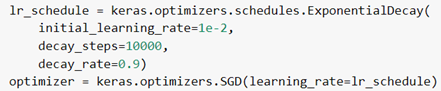

In [ ]:
# Define the learning rate schedule function

def lr_function(epoch, lr=0.01, decay_rate=0.9, decay_steps=10):
  # compute the learning rate for the current epoch
  exp = np.floor((1 + epoch) / decay_steps)
  alpha = lr * (decay_rate ** exp)
  # return the learning rate
  return float(alpha)
  

In [ ]:
tf.random.set_seed(42)
model = build_model()
history = model.fit(X,y, validation_data=(Xval,yval), epochs=50, batch_size=10, 
                    callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_function, verbose=1)])

Epoch 1/50
15/15 [==============================] - 1s 12ms/step - loss: 0.6966 - accuracy: 0.5533 - val_loss: 0.6678 - val_accuracy: 0.5800
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.5400 - val_loss: 0.6608 - val_accuracy: 0.6600
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5733 - val_loss: 0.7019 - val_accuracy: 0.4800
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.5467 - val_loss: 0.6577 - val_accuracy: 0.6000
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.6333 - val_loss: 0.6591 - val_accuracy: 0.6400
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6401 - accuracy: 0.6533 - val_loss: 0.6440 - val_accuracy: 0.6400
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5902 - accuracy: 0.7067 - val_loss: 0.6031 - val_accuracy: 0.7200
Epoch 8/50
15/15 [=

In [ ]:
tf.random.set_seed(42)
model = build_model()
history = model.fit(X,y, validation_data=(Xval,yval), epochs=50, batch_size=10, 
                    #callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_function, verbose=1), tf.keras.callbacks.CSVLogger("results.csv")])

Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.029999999329447746.
15/15 [==============================] - 1s 12ms/step - loss: 0.6966 - accuracy: 0.5533 - val_loss: 0.6678 - val_accuracy: 0.5800
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.029999999329447746.
15/15 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5400 - val_loss: 0.6608 - val_accuracy: 0.6600
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.029999999329447746.
15/15 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5733 - val_loss: 0.7019 - val_accuracy: 0.4800
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.029999999329447746.
15/15 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.5467 - val_loss: 0.6577 - val_accuracy: 0.6000
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.029999999329447746.
15/15 [======

# plot decision boundary

In [ ]:
parameters={}
a = np.zeros((10,3))
a[:,0] = np.array(model.weights[1])
a[:,1:3] = np.array(model.weights[0]).T
parameters['Theta1'] = a
b = np.zeros((10,11))
b[:,0] = np.array(model.weights[3])
b[:,1:11] = np.array(model.weights[2]).T
parameters['Theta2'] = b
c = np.zeros((10,11))
c[:,0] = np.array(model.weights[5])
c[:,1:11] = np.array(model.weights[4]).T
parameters['Theta3'] = c
d = np.zeros((1,11))
d[:,0] = np.array(model.weights[7])
d[:,1:11] = np.array(model.weights[6]).T
parameters['Theta4'] = d   

In [ ]:
def sigmoid(z):
  # convert input to a numpy array
  z  =  np.array(z)
  # initialize variables returned 
  g = np.zeros(z.shape)
  g = 1/(1+np.exp(-z))

  return g

In [ ]:
def relu(z):
  z  =  np.array(z)
  g = np.zeros(z.shape)
  g = np.maximum(0,z)

  return g

In [ ]:
def reluGradient(z):
  z  =  np.array(z)
  g = np.zeros(z.shape)
  g[z<0] = 0
  g[z>=0] = 1

  return g 

In [ ]:
def plotDecisionBoundary(parameters):
   
  #circle dataset
  u = np.linspace(-2, 2, 100)
  v = np.linspace(-2, 2, 100)
  t = np.zeros((u.size, v.size))
  #print(t.shape)
  L = len(parameters)
  #print(parameters)
  # Evaluate t 
  for i, ui in enumerate(u):
      for j, vj in enumerate(v):
        X = np.array([ui,vj]).reshape(-1,2)
        a = {}
        a[0] = X
        z = {}
        for l in range(L):
          a[l] = np.concatenate([np.ones((a[l].shape[0], 1)), a[l]], axis=1)
          #print(a[l].shape)
          z[l+1] = np.dot(a[l],parameters["Theta"+str(l+1)].T)
          #print(parameters["Theta"+str(l+1)].T.shape)
          if l!=(L-1):
            a[l+1] = relu(z[l+1])
          else:
            #print(z[l+1].shape)
            t[i, j] = z[l+1]

  #print(t)
  t = t.T  # important to transpose t before calling contour
      
  plt.contour(u, v, t, 0, linewidths=2, colors='g')

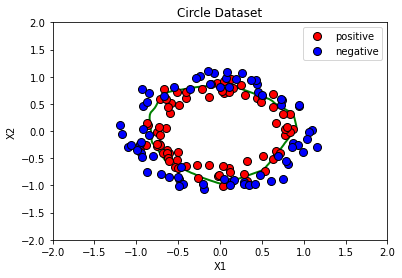

In [ ]:
# Plot decision boundary
fig = plt.figure()
plt.plot(X[pos, 0], X[pos, 1], 'o', markerfacecolor='r', markersize=8, markeredgecolor='k')
plt.plot(X[neg, 0], X[neg, 1], 'o', mfc='b', ms=8, mec='k')
plt.xlabel('X1')
plt.title('Circle Dataset')
plt.ylabel('X2')
plt.legend(['positive', 'negative'])
plotDecisionBoundary(parameters)
plt.show()

# Prediction

In [ ]:
pred = model.predict(Xtest[0:1,:]) 

In [ ]:
pred

array([[0.09080061]], dtype=float32)

In [ ]:
ytest[0]

0.0